<a href="https://colab.research.google.com/github/huseyincevik46/image_processing/blob/main/12_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![indir.png](attachment:indir.png)



![resim2.png](attachment:resim2.png)

![resim.png](attachment:resim.png)

![indir (2).png](<attachment:indir (2).png>)

# PROBLEMİN TANIMI
- Göz retinası Segmentasyonunu Yapay Zeka kullanarak modeleme

- PROBLEMİN AMACI:

- Bu projenin amacı, Göz retina görüntülerinin otomatik segmentasyonunu sağlamak için makine öğrenimi yöntemlerini kullanarak bir model geliştirmektir. Böylece, daha hızlı ve daha doğru bir segmentasyon süreci elde edilmesi hedeflenmektedir.
- PROBLEMİN FAYDALARI :
- Retinal kan damarlarının segmentasyonu, diyabetik retinopati, glokom ve hipertansiyon gibi hastalıkların erken teşhisinde çok önemlidir. Bu model, retina görüntülerini analiz ederek bu hastalıkların erken tanısına katkı sağlar.
-VERİ HAKKINDA
- https://www.kaggle.com/datasets/abdallahwagih/retina-blood-vessel/data
-PROBLEMİN GÖRSELİ
- 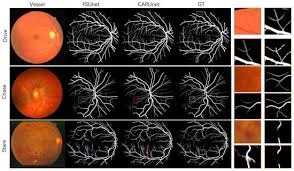

# Çözüm Aşamaları
- Görüntülerin Labelme ile etiketlenmesi.
- Etiketleme çıktısı olan json verilerinin kod yardımıyla png dosyasına
- çevrilmesi ve örneklendirilmesi.
- Verilerin modele verilebilmesi için hazır hale getirilmesi. (Normalizasyon)
- Model eğitiminin gerçekleştirilmesi (model.pth dosyasında).
- Model Testinin Gerçekleştirilmesi
- !!!Not: Keras ve - - TensorFlow kullandığımız için dosya uzantısı h5 şeklinde.

# AŞAMA 3 ETİKETLEME VE MODEL EĞİTİMİ

In [ ]:
!pip install labelme opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 67.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.3 MB/s eta 0:00:00
  Created wheel for labelme: filename=labelme-5.5.0-py3-none-any.whl size=1437463 sha256=5da43a9c0412077cce33b5a0eedb7ef7ed3ac55adacb0e9aa7702b886220364c
  Stored in directory: /root/.cache/pip/wheels/44/3a/5e/4

# TÜM GÖRÜNTÜLERİN JSON FORMATINDAN SİYAH BEYAZ PNG FORMATINA DÖNÜŞTRÜLMESİ

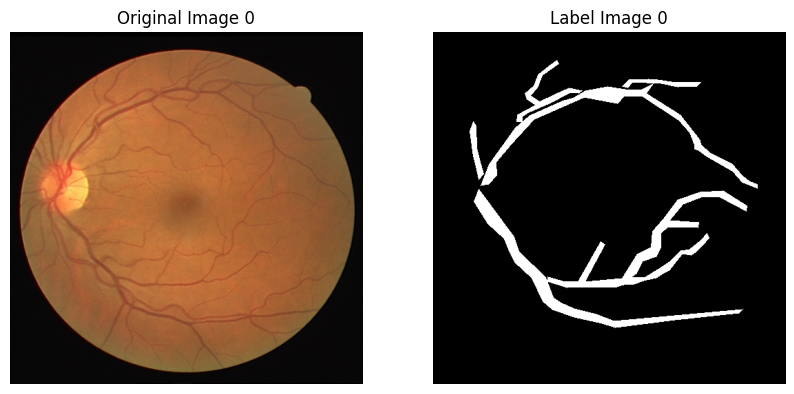

/content/drive/MyDrive/Db/label_image_0.png kaydedildi.


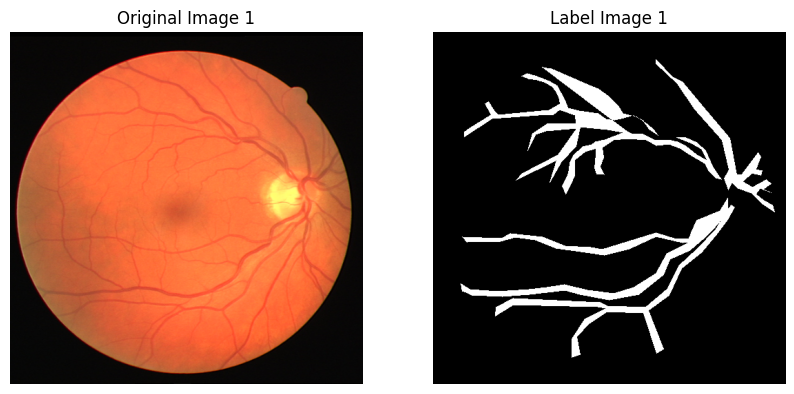

/content/drive/MyDrive/Db/label_image_1.png kaydedildi.


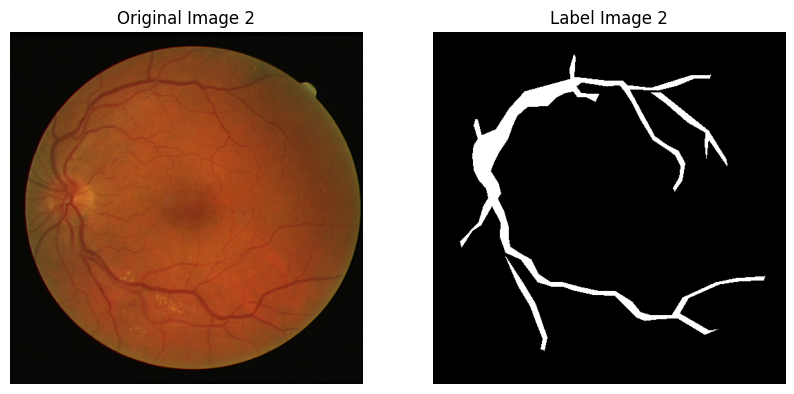

/content/drive/MyDrive/Db/label_image_2.png kaydedildi.


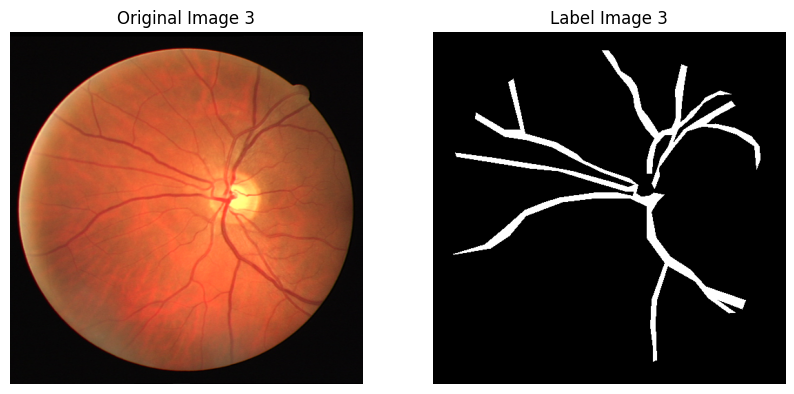

/content/drive/MyDrive/Db/label_image_3.png kaydedildi.


/content/drive/MyDrive/Db/label_image_4.png kaydedildi.


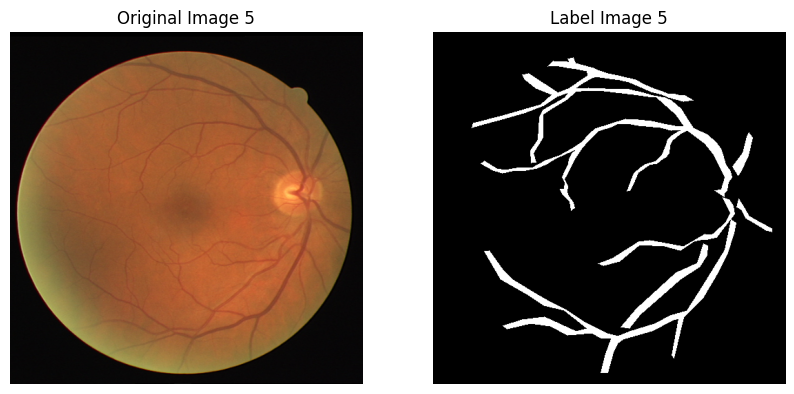

/content/drive/MyDrive/Db/label_image_5.png kaydedildi.


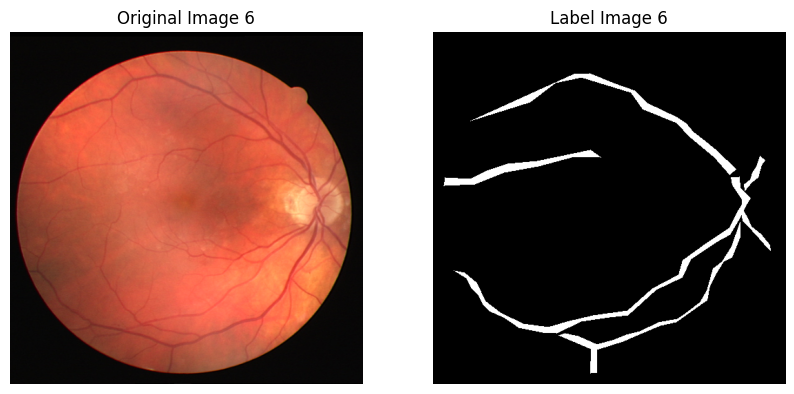

/content/drive/MyDrive/Db/label_image_6.png kaydedildi.


/content/drive/MyDrive/Db/label_image_7.png kaydedildi.


/content/drive/MyDrive/Db/label_image_8.png kaydedildi.


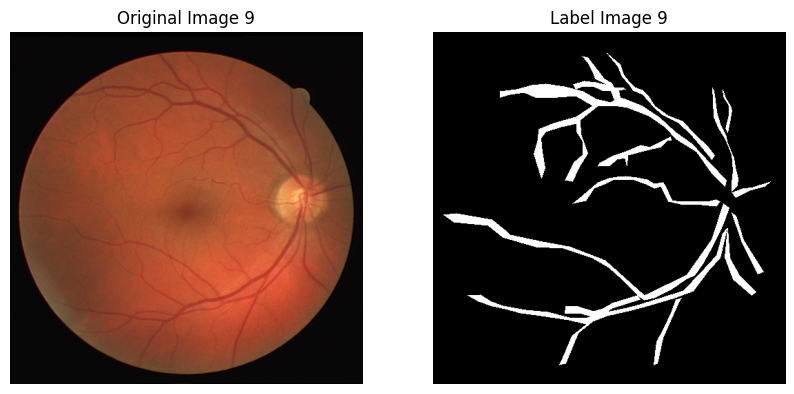

/content/drive/MyDrive/Db/label_image_9.png kaydedildi.


In [ ]:
import json
import os
import numpy as np
import cv2
from labelme import utils
import matplotlib.pyplot as plt

# Dosya yolları
json_dir = '/content/drive/MyDrive/Json'  # JSON dosyalarının olduğu klasör
image_dir = '/content/drive/MyDrive/Db'  # Orijinal görüntülerin olduğu klasör
output_dir = '/content/drive/MyDrive/Db'  # Label dosyalarını kaydetmek için hedef klasör

# JSON ve orijinal görüntü dosyalarını al
json_files = sorted([f for f in os.listdir(json_dir) if f.endswith('.json')])
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png') or f.endswith('.jpg')])

# Her JSON dosyası ve orijinal görüntü için label görüntü oluştur
for i, (json_file, image_file) in enumerate(zip(json_files, image_files)):
    json_path = os.path.join(json_dir, json_file)
    image_path = os.path.join(image_dir, image_file)

    # JSON dosyasını yükle
    with open(json_path) as f:
        data = json.load(f)

    # Görüntü dosyasını yükle
    image = utils.img_b64_to_arr(data['imageData'])

    # Label görüntüsünü oluşturmak için etiket adlarını değerlerle eşleştir
    label_name_to_value = {shape['label']: idx + 1 for idx, shape in enumerate(data['shapes'])}

    # Label görüntüsünü oluştur
    label_img, _ = utils.shapes_to_label(image.shape, data['shapes'], label_name_to_value)

    # Label görüntüsünü uint8 formatına dönüştür ve normalize et
    label_img = label_img.astype(np.uint8)

    # Çıkış dosya yollarını oluştur
    label_img_path = os.path.join(output_dir, f'label_image_{i}.png')

    # Siyah beyaz görüntüyü kaydet
    cv2.imwrite(label_img_path, label_img)

    # Orijinal görüntü ve label görüntüsünü göster
    plt.figure(figsize=(10, 5))

    # Orijinal görüntü
    plt.subplot(1, 2, 1)
    plt.title(f'Original Image {i}')
    plt.imshow(image)
    plt.axis('off')

    # Label görüntüsü
    plt.subplot(1, 2, 2)
    plt.title(f'Label Image {i}')
    plt.imshow(label_img, cmap='gray')
    plt.axis('off')

    plt.show()

    print(f'{label_img_path} kaydedildi.')


In [ ]:
#GEREKLİ KÜTÜPHANE YÜKLEMELERİ

!pip install numpy opencv-python labelme matplotlib


# İLK 3 VERİ GÖSTERİMİ ORİJİNAL İMAGE VE LABEL İMAGE

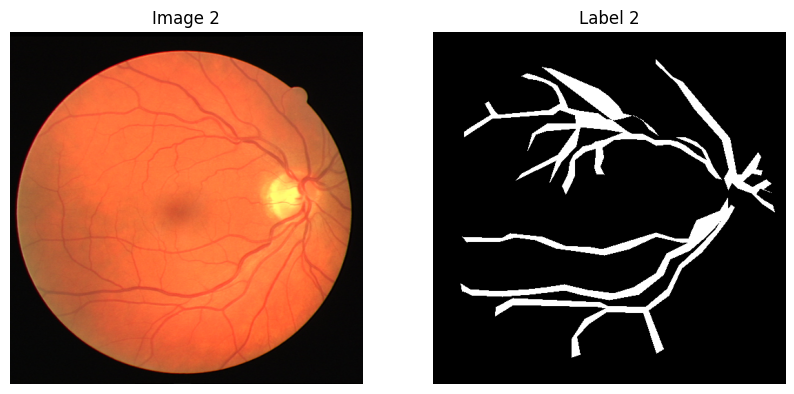

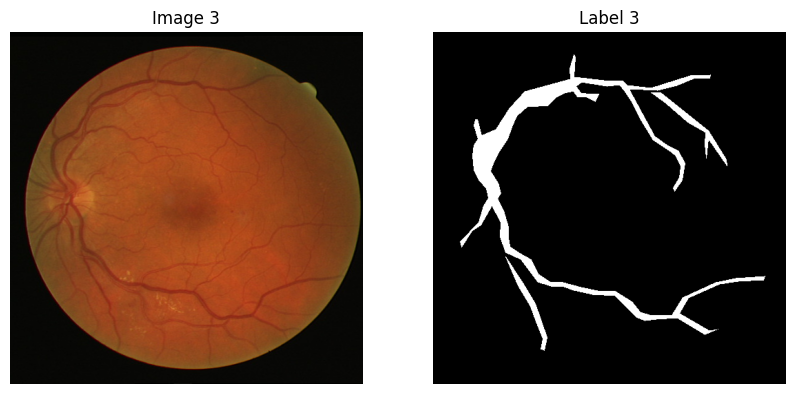

In [ ]:
import json
import os
import numpy as np
import cv2
from labelme import utils
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Görüntüleri ve etiketleri yüklemek için fonksiyon
def load_image_and_labels(json_dir, image_dir):
    json_files = sorted([f for f in os.listdir(json_dir) if f.endswith('.json')])
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png') or f.endswith('.jpg')])

    images = []
    labels = []

    for json_file, image_file in zip(json_files, image_files):
        json_path = os.path.join(json_dir, json_file)
        image_path = os.path.join(image_dir, image_file)

        # JSON dosyasını yükle
        with open(json_path) as f:
            data = json.load(f)

        # Orijinal görüntüyü yükle
        image = utils.img_b64_to_arr(data['imageData'])

        # Label görüntüsünü oluştur
        label_name_to_value = {shape['label']: i + 1 for i, shape in enumerate(data['shapes'])}
        label_img, _ = utils.shapes_to_label(image.shape, data['shapes'], label_name_to_value)

        images.append(image)
        labels.append(label_img)

    return images, labels

# Normalize etme fonksiyonu
def normalize_images(images):
    scaler = MinMaxScaler()
    normalized_images = []

    for img in images:
        img_reshaped = img.reshape(-1, img.shape[2]) if len(img.shape) == 3 else img.reshape(-1, 1)
        normalized_img = scaler.fit_transform(img_reshaped)
        normalized_images.append(normalized_img.reshape(img.shape))

    return normalized_images

# Giriş ve etiket görüntülerini yükle
json_dir = '/content/drive/MyDrive/Json'
image_dir = '/content/drive/MyDrive/Db'
images, labels = load_image_and_labels(json_dir, image_dir)

# İlk 3 görüntüyü ve etiketlerini göster
for i in range(3):
    plt.figure(figsize=(10, 5))

    # Orijinal görüntü
    plt.subplot(1, 2, 1)
    plt.title(f'Image {i+1}')
    plt.imshow(images[i])
    plt.axis('off')

    # Label görüntüsü
    plt.subplot(1, 2, 2)
    plt.title(f'Label {i+1}')
    plt.imshow(labels[i], cmap='gray')
    plt.axis('off')

    plt.show()

# Normalize edilmiş görüntüleri elde et
normalized_images = normalize_images(images)




# SCALE NORM KULLANIMI MODELLEME EĞİTİM VE TEST EN İYİ EN KÖTÜ SONUÇLAR

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 204s 204s/step - accuracy: 0.9272 - loss: 0.6922 - val_accuracy: 0.9546 - val_loss: 0.6685
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 192s 192s/step - accuracy: 0.9274 - loss: 0.6875 - val_accuracy: 0.9546 - val_loss: 0.6614
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 205s 205s/step - accuracy: 0.9274 - loss: 0.6821 - val_accuracy: 0.9546 - val_loss: 0.6512
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 204s 204s/step - accuracy: 0.9274 - loss: 0.6709 - val_accuracy: 0.9546 - val_loss: 0.6282
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 189s 189s/step - accuracy: 0.9274 - loss: 0.6459 - val_accuracy: 0.6829 - val_loss: 0.5978
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 199s 199s/step - accuracy: 0.7636 - loss: 0.5900 - val_accuracy: 0.9546 - val_loss: 2.5513
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 207s 207s/step - accuracy: 0.9274 - loss: 4.1049 - val_accuracy: 0.9546 - val_loss: 0.5394
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 210s 210s/step - accuracy: 0.9274 - loss: 0.5681 - val_accuracy: 0.3288 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


<Axes: >

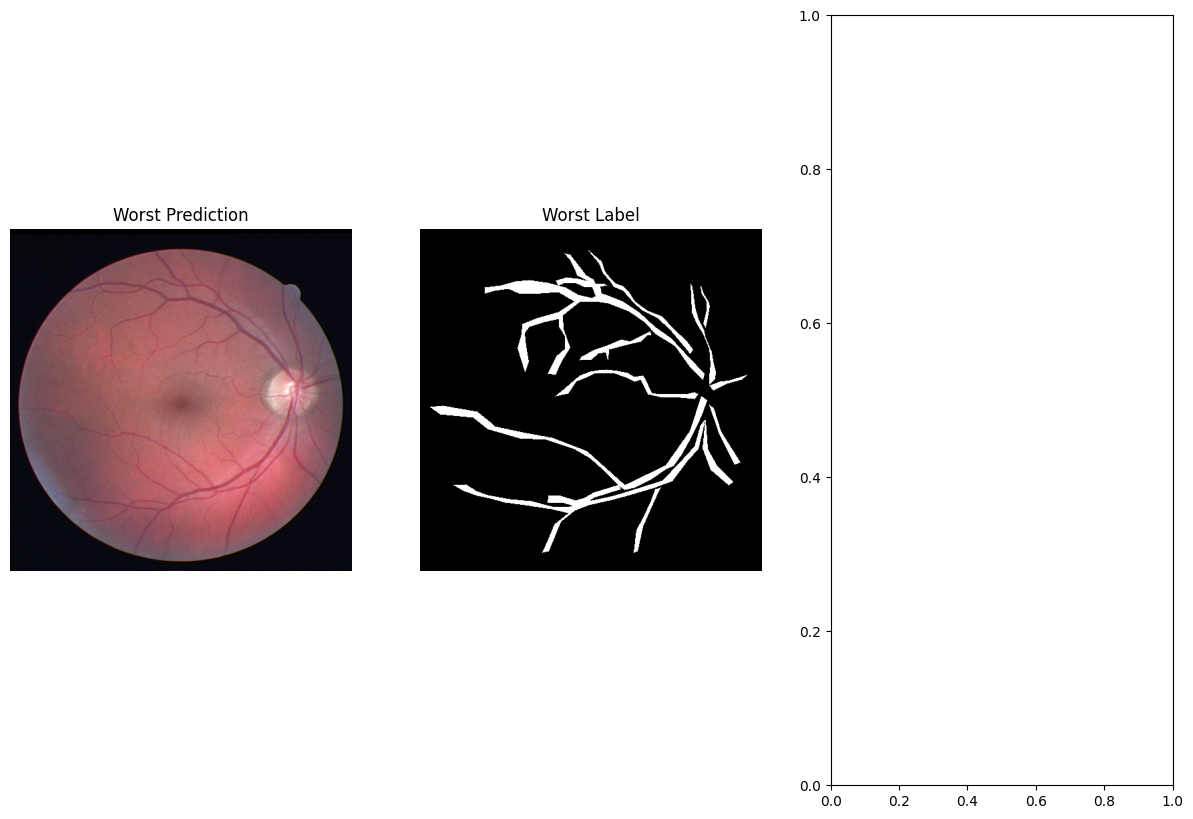

In [ ]:
import json
import os
import numpy as np
import cv2
from labelme import utils
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score

# Görüntüleri ve etiketleri yüklemek için fonksiyon
def load_image_and_labels(json_dir, image_dir):
    json_files = sorted([f for f in os.listdir(json_dir) if f.endswith('.json')])
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png') or f.endswith('.jpg')])

    images = []
    labels = []

    for json_file, image_file in zip(json_files, image_files):
        json_path = os.path.join(json_dir, json_file)
        image_path = os.path.join(image_dir, image_file)

        # JSON dosyasını yükle
        with open(json_path) as f:
            data = json.load(f)

        # Orijinal görüntüyü yükle
        image = utils.img_b64_to_arr(data['imageData'])

        # Label görüntüsünü oluştur
        label_name_to_value = {shape['label']: i + 1 for i, shape in enumerate(data['shapes'])}
        label_img, _ = utils.shapes_to_label(image.shape, data['shapes'], label_name_to_value)

        images.append(image)
        labels.append(label_img)

    return np.array(images), np.array(labels)

# Normalize etme fonksiyonu
def normalize_images(images):
    scaler = MinMaxScaler()
    normalized_images = []

    for img in images:
        img_reshaped = img.reshape(-1, img.shape[2]) if len(img.shape) == 3 else img.reshape(-1, 1)
        normalized_img = scaler.fit_transform(img_reshaped)
        normalized_images.append(normalized_img.reshape(img.shape))

    return np.array(normalized_images)

# U-Net modelini oluşturma fonksiyonu
def unet_model(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Ana kod
json_dir = '/content/drive/MyDrive/Json'
image_dir = '/content/drive/MyDrive/Db'
images, labels = load_image_and_labels(json_dir, image_dir)

# Normalize edilmiş görüntüleri elde et
normalized_images = normalize_images(images)

# Eğitim için verileri ayırma
train_size = int(0.8 * len(normalized_images))
X_train = normalized_images[:train_size]
y_train = labels[:train_size]
X_test = normalized_images[train_size:]
y_test = labels[train_size:]

# U-Net modelini oluştur
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
model = unet_model(input_shape)

# Modeli eğit
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Eğitim sürecinin doğruluk ve kayıp grafiklerini çizme
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Test verisi ile tahmin yapma
predictions = model.predict(X_test)

# En iyi ve en kötü tahminleri bulma
predictions = (predictions > 0.5).astype(np.uint8)  # Binarize predictions
accuracies = [accuracy_score(y_test[i].flatten(), predictions[i].flatten()) for i in range(len(y_test))]

best_index = np.argmax(accuracies)
worst_index = np.argmin(accuracies)

# En iyi ve en kötü tahminleri gösterme
plt.figure(figsize=(15, 10))

# En iyi tahmin
plt.subplot(1, 3, 1)
plt.title('Best Prediction')
plt.imshow(X_test[best_index])
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Best Label')
plt.imshow(y_test[best_index], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Best Predicted')
plt.imshow(predictions[best_index], cmap='gray')
plt.axis('off')

plt.show()

# En kötü tahmin
plt.figure(figsize=(15, 10))

# En kötü tahmin
plt.subplot(1, 3, 1)
plt.title('Worst Prediction')
plt.imshow(X_test[worst_index])
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Worst Label')
plt.imshow(y_test[worst_index], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)


# ACCURACY VE LOSS

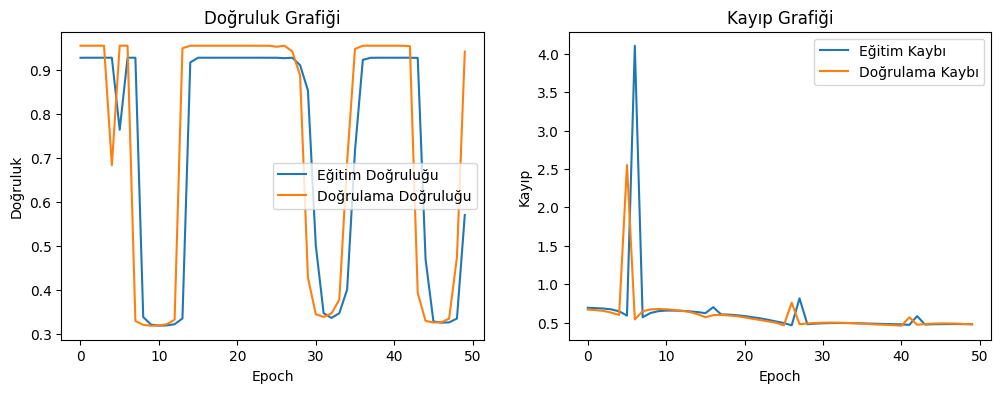

In [ ]:
import matplotlib.pyplot as plt

# Eğitim sürecinin doğruluk ve kayıp grafiklerini çizme
plt.figure(figsize=(12, 4))

# Doğruluk grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

# Kayıp grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.show()


# TAHMİN SONUÇLARININ GÖSTERİLMESİ

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


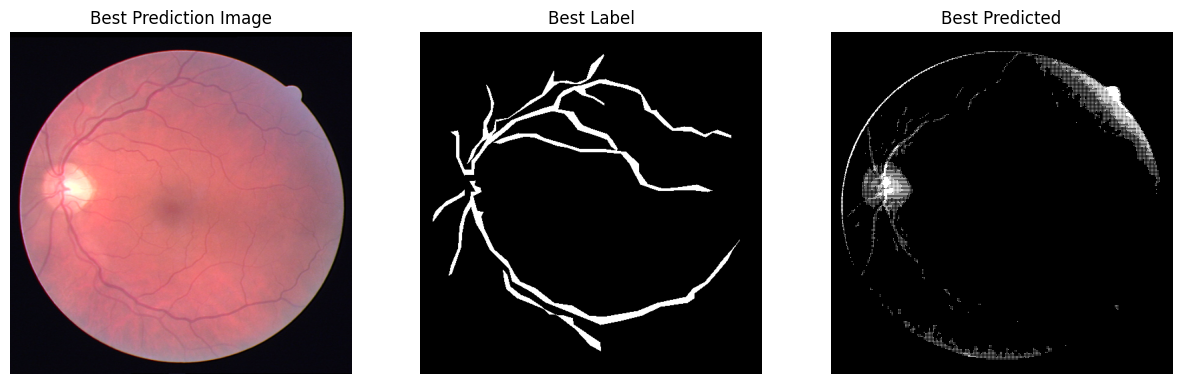

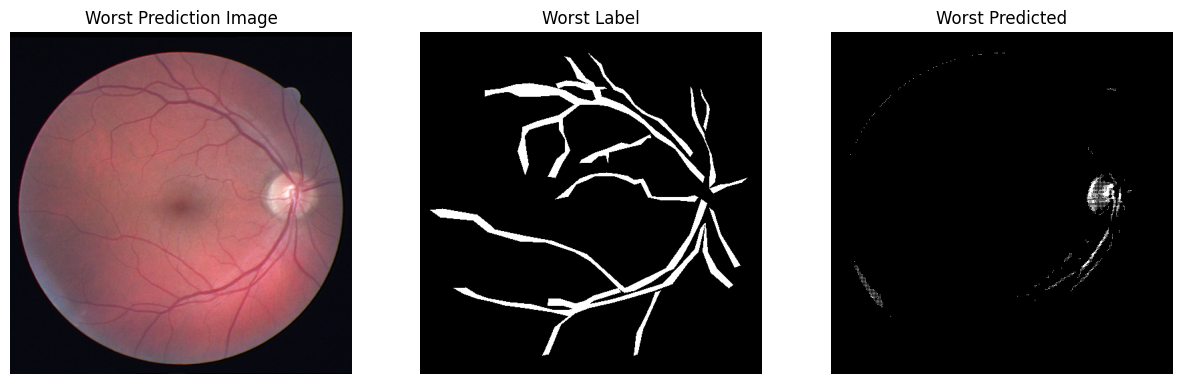

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Test verisi ile tahmin yapma
predictions = model.predict(X_test)

# En iyi ve en kötü tahminleri bulma
predictions = (predictions > 0.5).astype(np.uint8)  # Binarize predictions
accuracies = [accuracy_score(y_test[i].flatten(), predictions[i].flatten()) for i in range(len(y_test))]

best_index = np.argmax(accuracies)
worst_index = np.argmin(accuracies)

# En iyi tahmin
plt.figure(figsize=(15, 5))

# En iyi tahmin
plt.subplot(1, 3, 1)
plt.title('Best Prediction Image')
plt.imshow(X_test[best_index])
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Best Label')
plt.imshow(y_test[best_index], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Best Predicted')
plt.imshow(predictions[best_index], cmap='gray')
plt.axis('off')

plt.show()

# En kötü tahmin
plt.figure(figsize=(15, 5))

# En kötü tahmin
plt.subplot(1, 3, 1)
plt.title('Worst Prediction Image')
plt.imshow(X_test[worst_index])
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Worst Label')
plt.imshow(y_test[worst_index], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Worst Predicted')
plt.imshow(predictions[worst_index], cmap='gray')
plt.axis('off')

plt.show()


# MODELİ KAYDETME

In [ ]:
# Modeli kaydet
model.save('model.h5')  # .h5 formatında kaydedilir
